In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

In [2]:
df_final = pd.read_csv('./data/fire_frug_all.csv')

C:\Users\sarah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_final.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_patreon_flair,author_full,...,pwls,retr_on,score,stickied,subreddit,text,time,title,tot_awards,upvote_r
0,0,0,0,SMITBOMB,NaN,[],NaN,text,False,t2_3yxsd0ki,...,6,1643733499,1,False,Fire,"Lately, I’ve really been contemplating the pur...",1643733488,Do I really need to invest?,0,1.0
1,1,1,1,Riffington,NaN,[],NaN,text,False,t2_dyavg,...,6,1643730749,1,False,Fire,I can’t seem to find the step by step roadmap ...,1643730738,Savings planning roadmap,0,1.0


In [3]:
df_final['subreddit'].value_counts()

Fire      19700
Frugal    18650
Name: subreddit, dtype: int64

In [4]:
# prepare target

df_final['subreddit'] = df_final['subreddit'].map(lambda x: 1 if x=='Fire' else 0)

In [5]:
df_final['subreddit'].value_counts()

1    19700
0    18650
Name: subreddit, dtype: int64

In [6]:
df_final['fullpost']= df_final['title'] + ' ' + df_final['text']

In [7]:
X = df_final['fullpost']

In [8]:
y = df_final['subreddit']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=133)

In [12]:
cvect = CountVectorizer(stop_words='english')

In [11]:
nbayes = MultinomialNB()

In [14]:
X_train_cv = cvect.fit_transform(X_train)
X_train_cv

<28762x7800 sparse matrix of type '<class 'numpy.int64'>'
	with 1394464 stored elements in Compressed Sparse Row format>

In [15]:
X_train_cv.shape

(28762, 7800)

In [16]:
X_test_cv = cvect.transform(X_test)

In [17]:
nbayes.fit(X_train_cv, y_train)

MultinomialNB()

In [18]:
nbayes.score(X_test_cv, y_test)

0.9969753858990404

In [19]:
nbayes.score(X_train_cv, y_train)

0.9975314651275989

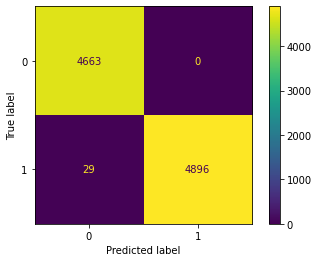

In [20]:
ConfusionMatrixDisplay.from_estimator(nbayes, X_test_cv, y_test);

In [26]:
bvocab = cvect.get_feature_names_out()
bvocab

array(['00', '000', '000k', ..., 'করল', 'মন', 'হচ'], dtype=object)

In [28]:
nboutp = pd.DataFrame(X_train_cv.A, columns=bvocab)
nboutp

,00,000,000k,006,01,015,02,03,035,05,...,zestimate,zing,zone,zoom,zoos,équation,করব,করল,মন,হচ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28760,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
nboutp.sum().sort_values(ascending=False)[:20]
#top 20 words for both subreddits

just      15061
like      13151
money     13013
years     12775
year      12647
don       10961
want       9616
time       9380
work       9189
ve         9002
job        8324
know       7773
000        7621
buy        7150
need       6898
good       6818
people     6635
make       6458
new        6369
income     6363
dtype: int64

In [30]:
coef = {'feature': cvect.get_feature_names_out(), 
        'coef': nbayes.coef_}

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [23]:
nbvar_outp = pd.DataFrame(nbayes.coef_).T.set_index(cvect.get_feature_names_out())

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [24]:
nbvar_outp

,0
00,-7.020834
000,-5.125083
000k,-10.527098
006,-10.415872
01,-9.735970
...,...
équation,-10.389897
করব,-14.053458
করল,-14.053458
মন,-14.053458


In [33]:
nbvar_outp.sort_values(by=0, ascending=False)[:20]
#top 20 words of importance indicating fire subreddit

,0
years,-4.739659
year,-4.780989
just,-4.864342
money,-4.953938
like,-5.011063
000,-5.125083
work,-5.163737
want,-5.166635
don,-5.173568
job,-5.233350


In [34]:
nbvar_outp.sort_values(by=0, ascending=False)[-20:]
#bottom 20 words of importance indicating frugal subreddit

,0
clocks,-14.053458
portioned,-14.053458
portions,-14.053458
portrait,-14.053458
portugal,-14.053458
cliff,-14.053458
positively,-14.053458
possessions,-14.053458
clicking,-14.053458
click,-14.053458


In [28]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[('cvect',CountVectorizer()), ('nbayes', MultinomialNB())])

In [33]:
#first try on parameters
params = {
    'nbayes__alpha':[0.1, 2], 
    'cvect__ngram_range':[(1,2), (1,3)], 
    'cvect__max_df':[0.5, 0.7, 1]
    }

In [34]:
# grid search
gs = GridSearchCV(pipe, param_grid=params, n_jobs=-1)

In [35]:
# fit the model
gs.fit(X_train, y_train)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\sarah\anacond

GridSearchCV(estimator=Pipeline(steps=[('cvect', CountVectorizer()),
                                       ('nbayes', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvect__max_df': [0.5, 0.7, 1],
                         'cvect__ngram_range': [(1, 2), (1, 3)],
                         'nbayes__alpha': [0.1, 2]})

In [21]:
#second try on parameters
params = {
    'multinomialnb__alpha':[0.1, 2], 
    'countvectorizer__ngram_range':[(1,2), (1,3)], 
    'countvectorizer__max_df':[1, 5, 10]
    }

In [22]:
# grid search number 2
gs = GridSearchCV(pipe, param_grid=params, n_jobs=-1)

In [23]:
# fit the model
gs.fit(X_train, y_train)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\sarah\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\sarah\anacond

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.